In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization


In [ ]:
### Goal is to predict medical cost based on their history and details
### i am a insurance company and i need to decide how much insurance to charge them based on how much medical cost they can incur

In [ ]:
## 1. Read data
## 2. quick look on data


In [2]:
df_insruance = pd.read_csv('insurance.csv')

df_insruance.shape

## 1338 rows and 7 columns/features

(1338, 7)

In [3]:
df_insruance.head()

## rough understanding of columns and values

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df_insruance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
### handle missing values
(df_insruance.isnull().sum()/ df_insruance.count()).sort_values(ascending=False)

## if it was very less null just drop the rows
# df_clean = df_insruance.dropna()
# df_clean.shape

# df_insruance.isnull().sum()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [5]:
df_insruance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Observations
# 1. data looks good overall condition
# 2. age mean is 39...people are taking insurance post age 18 and majorly around age 39
# 3. bmi is majorily around 30
# 4. majority of population has around 2 kids
# 5. charges has lot of variability in it

In [19]:
features = df_insruance.columns
features

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
import pandas as pd

# Assume df is your DataFrame
df = df_insruance.copy()

# Types
numerical = df.select_dtypes(include=['int64', 'float64','number']).columns.tolist()
categorical = df.select_dtypes(include='object').columns.tolist()
boolean = df.select_dtypes(include='bool').columns.tolist()
datetime = df.select_dtypes(include='datetime').columns.tolist()

# # Add-on: Check for text (long string) features
# text = [col for col in categorical if df[col].str.len().mean() > 30]  # Heuristic

# # Optional: Check for high cardinality categorical
# high_card = [col for col in categorical if df[col].nunique() > 50]

# # Remove overlaps
# text = list(set(text))
# categorical_cleaned = list(set(categorical) - set(text) - set(high_card))

# Summary
print("Numerical:", numerical)
print("Categorical:", categorical)
# print("Text:", text)
print("Boolean:", boolean)
print("Datetime:", datetime)
# print("High Cardinality Categorical:", high_card)


Numerical: ['age', 'bmi', 'children', 'charges']
Categorical: ['sex', 'smoker', 'region']
Boolean: []
Datetime: []


In [29]:
#### process and check missing value in each type of 

In [ ]:
# Observations
# 1. missing data is not there
# 2. there are 3 numberical features, 3 cat features, 1 target variable which is numberical
# 3. 

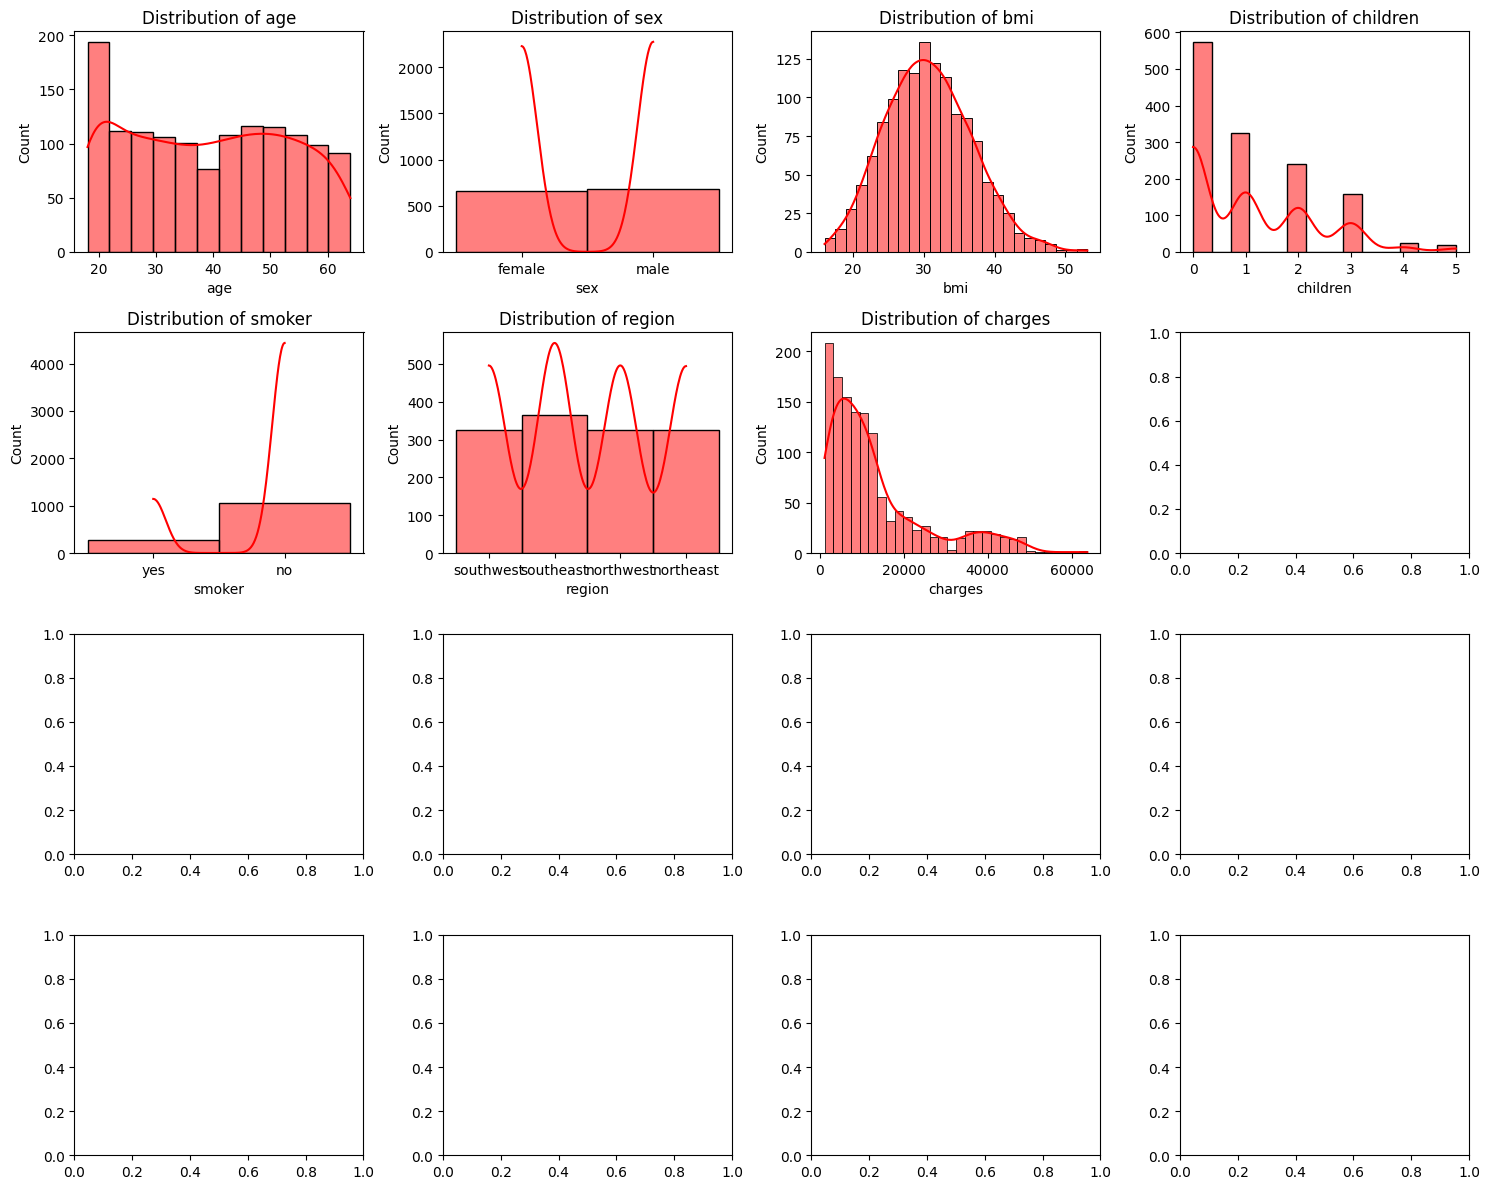

In [30]:
# Create 9 subplots (3x3 grid)
fig, axes = plt.subplots(4, 4, figsize=(15, 12))

for i, feature in enumerate(features):
    ax = axes[i // 4, i % 4]  # Row, Column logic
    sns.histplot(data=df_insruance, x=feature, kde=True, ax=ax, color='r')
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
## Observation 
## 1. Age is almost uniformly distribution with bit of more frequency in low age
## 2. Sex is also almost uniform
## 3. bmi is normally distribution
## 4. Distribution of children is mostly 75% have 2 , but some have 3,4,5
## 5. major population is no smoker
## 4. region is also equally distirbuted
## 5 charges is right skewed like majority of population is paying less insurance there are right tail


<Axes: >

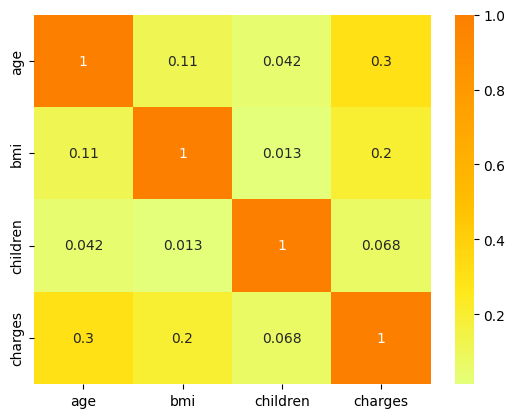

In [31]:
# correlation plot
corr = df_insruance[numerical].corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [ ]:
## 1. age is quite correlated with charges which algins with logic was well
## 2. bmi is also slightly correlated
## 3. children also has a positive but extremely low correlation



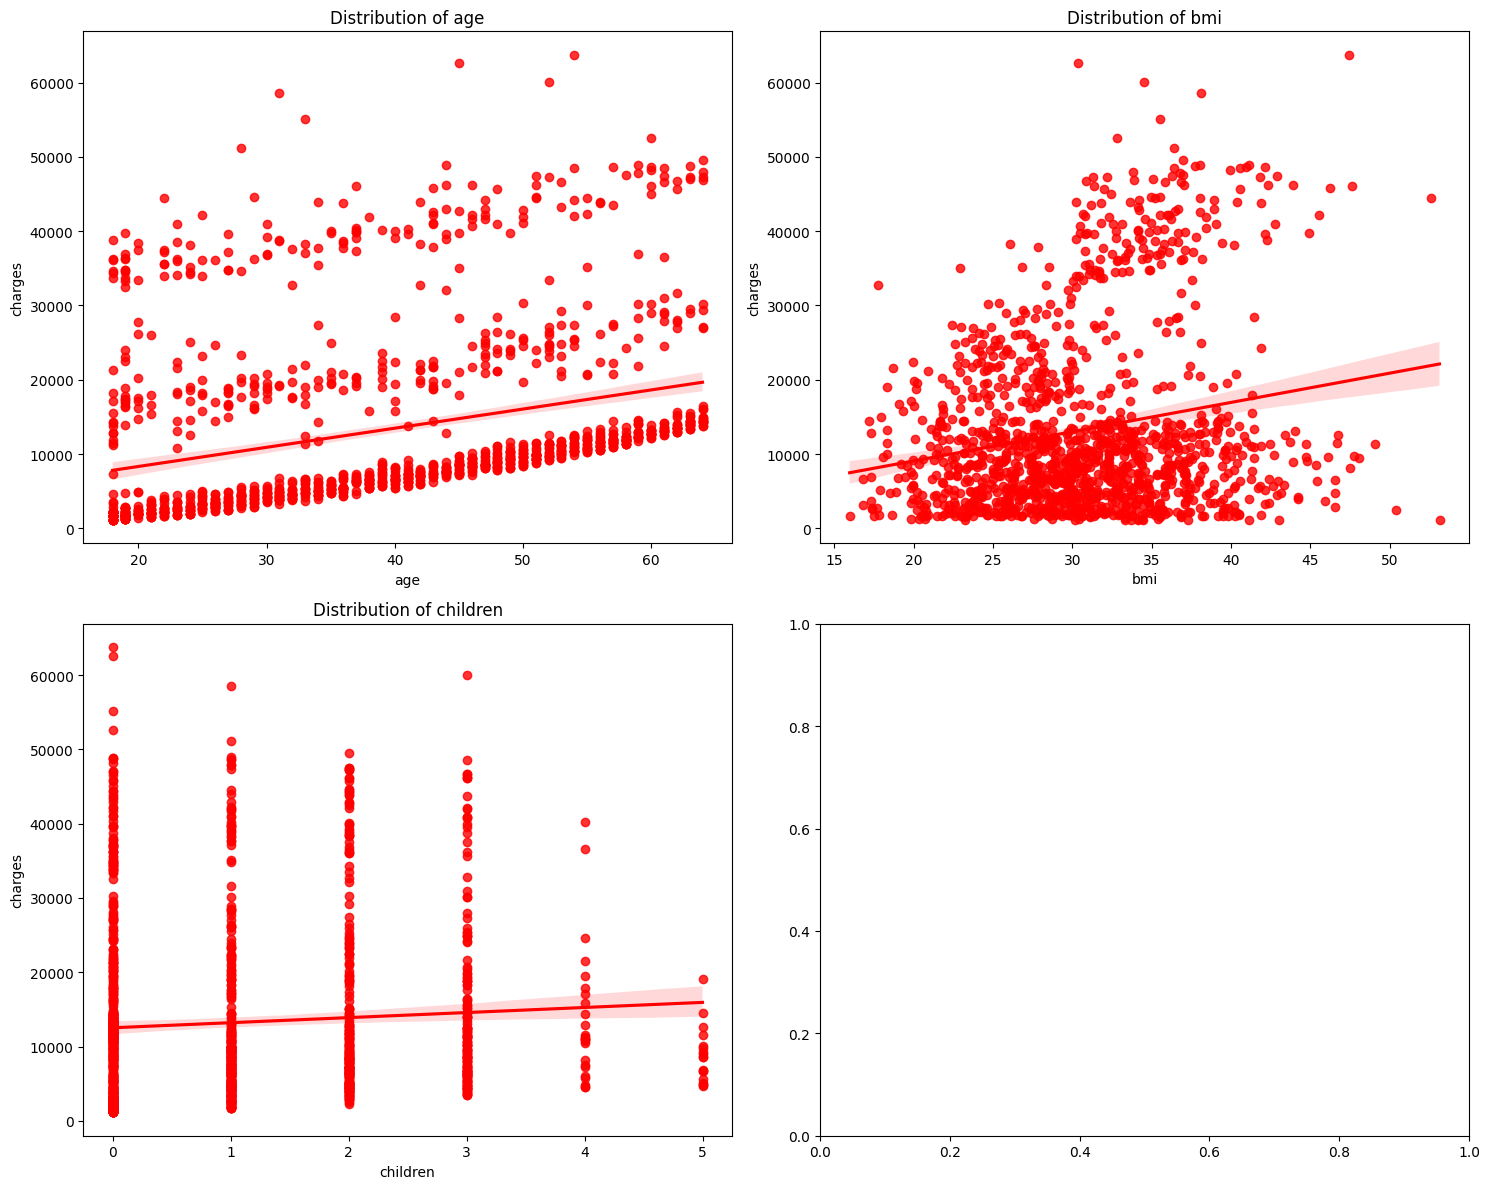

<Figure size 640x480 with 0 Axes>

In [ ]:
# Let's assume this is your DataFrame
df = df_insruance.copy()

# Target variable
target = 'charges'

# Select numeric features (excluding the target)
numeric_features = df.select_dtypes(include='number').columns.drop(target)


fig, axes = plt.subplots(2,2, figsize=(15, 12))

for i, feature in enumerate(numeric_features):
    ax = axes[i // 2, i % 2]  # Row, Column logic
    sns.regplot(x=feature, y=target, data=df, ax=ax, color='r')
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


In [ ]:
## children doesnt look that good for indicator in fitting line
## age is slightly better fitting on line with charges
## 

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

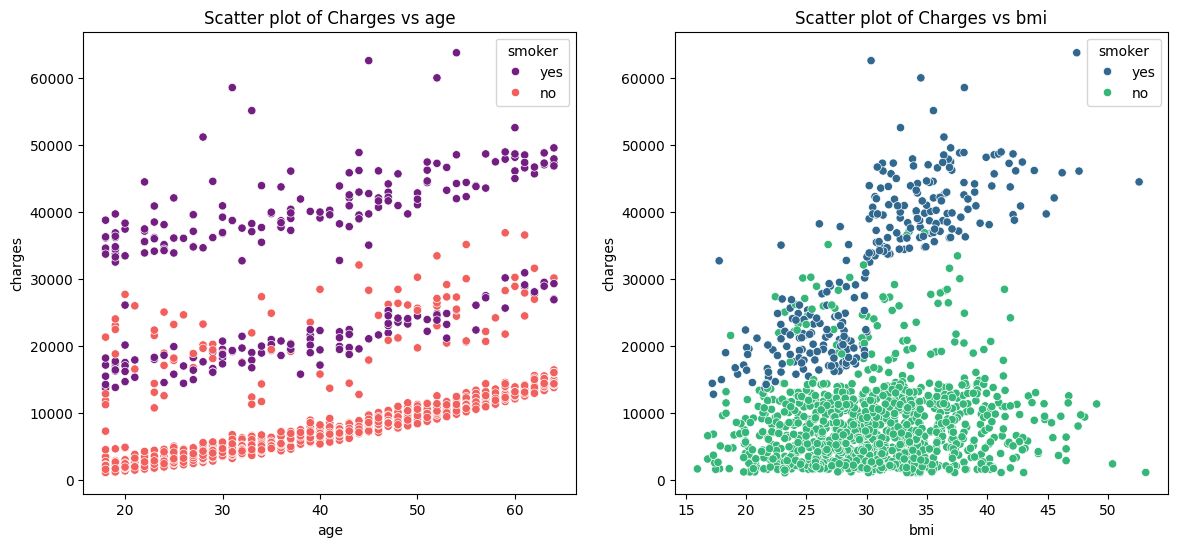

In [34]:
# some just dissecting the data  -> based on numberical feature and target (dissect on cat)
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')


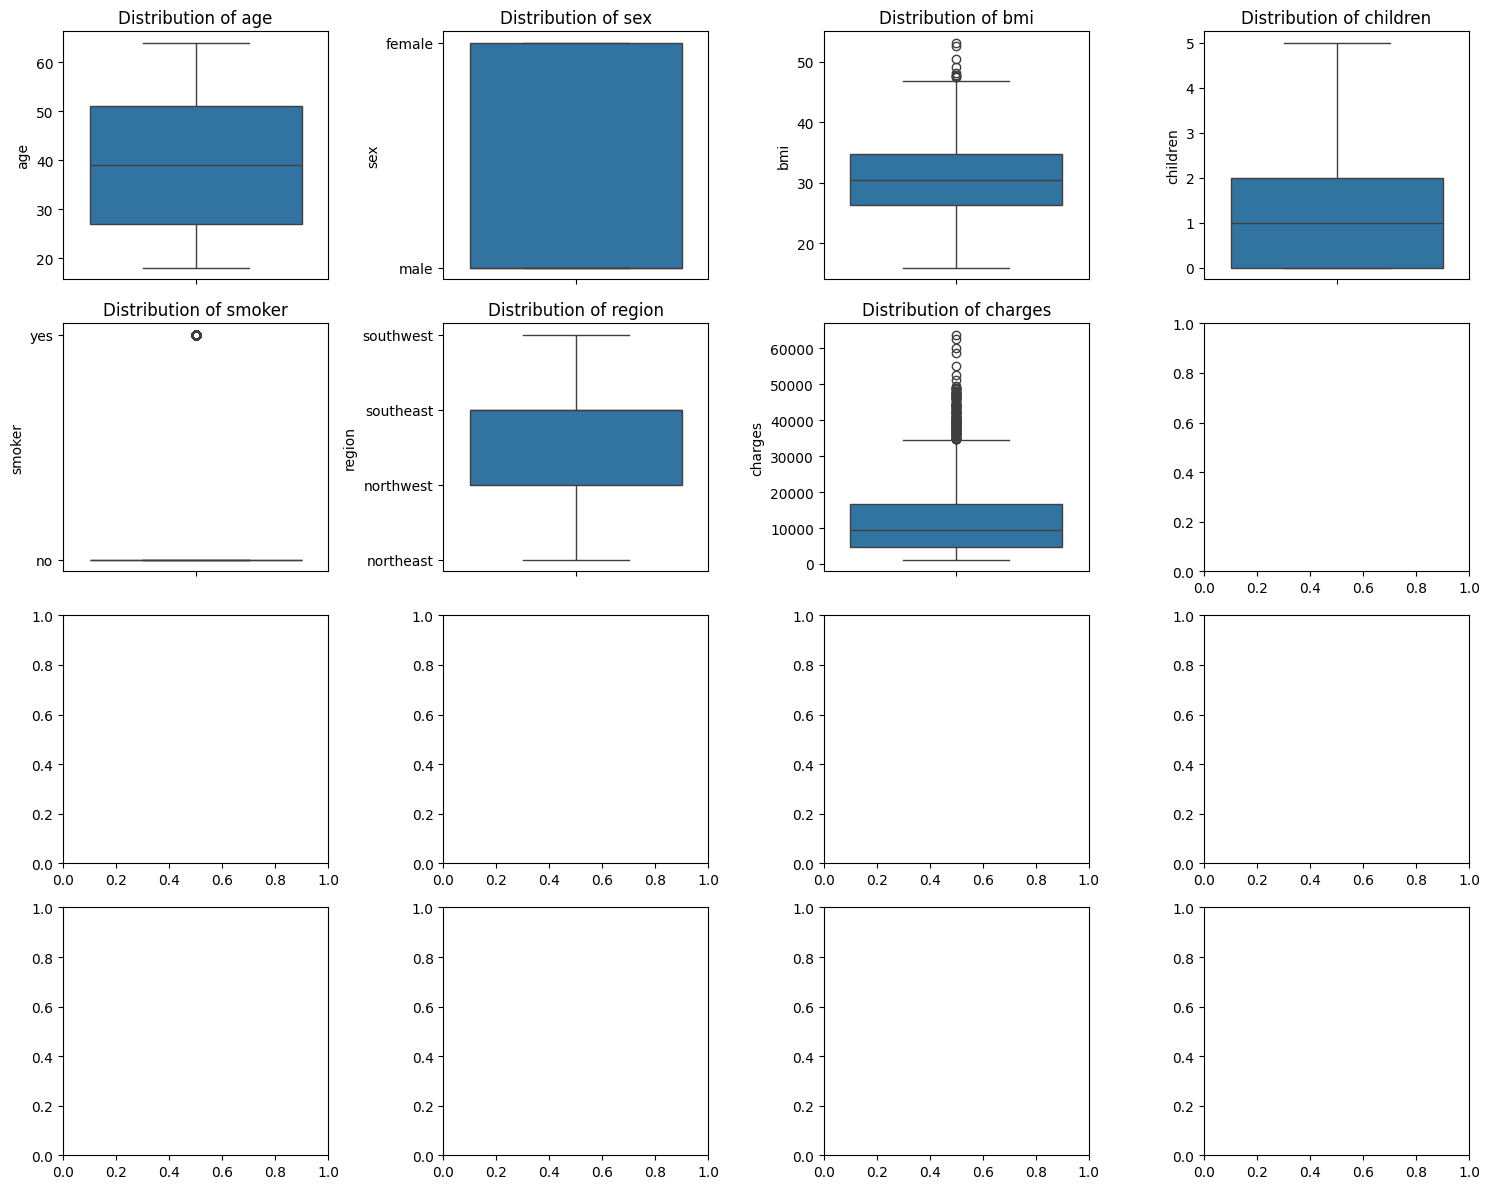

In [28]:
# Create 9 subplots (3x3 grid)
fig, axes = plt.subplots(4, 4, figsize=(15, 12))

for i, feature in enumerate(features):
    ax = axes[i // 4, i % 4]  # Row, Column logic
    # sns.histplot(data=df_insruance, x=feature, kde=True, ax=ax, color='r')
    sns.boxplot(y=df[feature],ax=ax)

    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
### bmi has bit of outliers represting bit of skew distribution
## and charges as well representing bit of outliers indiciating right skew distribution
## rest features looks quite uniform

In [ ]:
### from this we can see that dissecting smoker cat with any features gives a clear boundary


## To conclude on EDA
# Observations
# 1. data looks good overall condition
# 2. age mean is 39...people are taking insurance post age 18 and majorly around age 39
# 3. bmi is majorily around 30
# 4. majority of population has around 2 kids
# 5. charges has lot of variability in it
# Observations
# 1. missing data is not there
# 2. there are 3 numberical features, 3 cat features, 1 target variable which is numberical
# 3. 
## Observation 
## 1. Age is almost uniformly distribution with bit of more frequency in low age
## 2. Sex is also almost uniform
## 3. bmi is normally distribution
## 4. Distribution of children is mostly 75% have 2 , but some have 3,4,5
## 5. major population is no smoker
## 4. region is also equally distirbuted
## 5 charges is right skewed like majority of population is paying less insurance there are right tail

## 1. age is quite correlated with charges which algins with logic was well
## 2. bmi is also slightly correlated
## 3. children also has a positive but extremely low correlation

## children doesnt look that good for indicator in fitting line
## age is slightly better fitting on line with charges
## 
## from this we can see that dissecting smoker cat with any features gives a clear boundary

### bmi has bit of outliers represting bit of skew distribution
## and charges as well representing bit of outliers indiciating right skew distribution
## rest features looks quite uniform

In [ ]:
#### DATA PREPROCESSING

## 1. numerical variables need to be scaled
## 2. cat varibales need to be numberically representated
## 3. timeseries needs to be handled
## 4. text preprocessing needs to be done


In [ ]:
## EDA
## feature scaling and handling
## feature engineering
## feature selection
##